# 1.0 Financial returns

## Investment risk
- Risk is a measure of uncertainty. Dispersion / variance of financial returns

### Measurements
1. Standard deviation / variance of daily returns
1. Kurtosis of the daily returns distribution
1. Skewness of the daily returns distribution
1. Historical drawdown

## A tale of 2 returns
- Discrete returns (simple returns) represent periodic (daily, weekly, monthly, etc) price movement
- Log returns are often used in financial modeling, they assume continuous compounding
    - Log returns are always smaller than discrete returns

Discrete returns: $ R_{t_2} = \frac{P_{t_2}-P_{t_1}}{P_{t_1}} $

Log returns: $ Rl_{t_2} = \frac{ln(P_{t_1})}{ln(P_{t_2})} = ln(P_{t_1}) - ln(P_{t_2}) $

In [1]:
import pandas as pd

In [2]:
msftPrices = pd.read_csv('data/MSFTPrices.csv', parse_dates=['Date'])
msftPrices = msftPrices.sort_values(by='Date')
msftPrices.set_index('Date', inplace=True)
msftPrices.head()

,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [3]:
msftPrices['Returns'] = msftPrices['Adjusted'].pct_change()
msftPrices.head()

,Open,High,Low,Close,Volume,Adjusted,Returns
Date,,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


In [4]:
import matplotlib.pyplot as plt

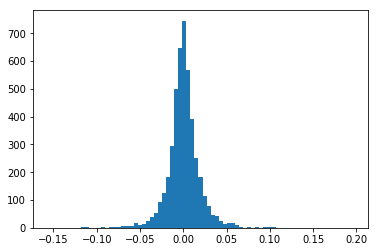

In [5]:
plt.hist(msftPrices['Returns'].dropna(), bins=75, density=False)
plt.show()

# 1.1 Mean, variance, and normal distributions

Probability distributions have the following moments:
1. Mean
1. Variance
1. Skewness
1. Kurtosis

Comparing against a normal distribution
- Normal distributions have a skewness near 0 and a kurtosis near 3
- Financial returns tend not to be normally distributed
- Financial returns can have high kurtosis

Standard deviation (volatility)
- Investment with higher SD is higher risk investment

In [6]:
import numpy as np

In [7]:
# Average daily return
np.mean(msftPrices['Returns'])

0.00037777546435757725

In [8]:
# Average annualized return assuming 252 trading days
((1+np.mean(msftPrices['Returns']))**252)-1

0.09985839482858783

In [9]:
# Standard deviation
np.std(msftPrices['Returns'])

0.019341100408708328

In [10]:
# Variance
# np.std(msftPrices['Returns'])**2
np.var(msftPrices['Returns'])

0.0003740781650197375

## Scaling volatility
- Volatility scales with the square root of time
- Assume 252 trading days in a year and 21 trading days in a month

$ \sigma_{annual} = \sigma_{daily} * \sqrt{252} $

$ \sigma_{monthly} = \sigma_{daily} * \sqrt{21} $

In [11]:
# Annualized volatility of returns
np.std(msftPrices['Returns']) * np.sqrt(252)

0.3070304505826317

# 1.3 Skewness and kurtosis

## Skewness
- It's the 3rd moment of a distribution
- **Negative skew**: Mass of distribution concentrated on the right side, a right-leaning curve
- **Positive skew**: Opposite of negative skew

In [12]:
from scipy.stats import skew

In [13]:
# If skewness > 0, it suggests non-normality
skew(msftPrices['Returns'].dropna())

0.21935459193067852

## Kurtosis
- Measure of the thickness of the tails of a distribution
- Most financial returns are leptokurtic
- **Leptokurtic**: distribution has positive excess kurtosis (> 3)
- **Excess kurtosis**: subtract 3 from sample kurtosis

In [14]:
from scipy.stats import kurtosis

In [15]:
# Excess kurtosis > 0, suggests non-normality
kurtosis(msftPrices['Returns'].dropna())

10.31457261802553

## Shapiro-Wilk test
- Testing for normality
- H0: data are normally distributed

In [16]:
from scipy import stats

In [17]:
pValue = stats.shapiro(msftPrices['Returns'].dropna())[1]
if pValue <= 0.05:
    print('H0 of normality is rejected.')
else:
    print('H0 of normality is accepted.')

H0 of normality is rejected.


# 2.0 Portfolio composition

## Portfolio return formula
$ R_{p} = R_{a_1}w_{a_1} + R_{a_2}w_{a_2} + ... + R_{a_n}w_{a_n} $

- $R_{p}$: portfolio return
- $R_{a_n}$: return for asset n
- $W_{a_n}$: weight for asset n

In [18]:
import numpy as np

In [19]:
stockReturns = pd.read_csv('data/Big9Returns2017.csv', index_col=['Date'], parse_dates=True).sort_index()
print(stockReturns.info())
stockReturns.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 9 columns):
AAPL    251 non-null float64
MSFT    251 non-null float64
XOM     251 non-null float64
JNJ     251 non-null float64
JPM     251 non-null float64
AMZN    251 non-null float64
GE      251 non-null float64
FB      251 non-null float64
T       251 non-null float64
dtypes: float64(9)
memory usage: 19.6 KB
None


,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [20]:
stockWeights = pd.read_csv('data/EfficientFrontierPortfoliosSlim.csv')
print(stockWeights.info())
stockWeights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
AAPL weight    39 non-null float64
MSFT weight    39 non-null float64
XOM weight     39 non-null float64
JNJ weight     39 non-null float64
JPM weight     39 non-null float64
AMZN weight    39 non-null float64
GE weight      39 non-null float64
FB weight      39 non-null float64
T weight       39 non-null float64
Returns        39 non-null float64
Volatility     39 non-null float64
dtypes: float64(11)
memory usage: 3.4 KB
None


,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473


In [21]:
portfolioReturns = pd.DataFrame(stockReturns.iloc[:39].values * stockWeights.iloc[:,:9].values, 
                        index=stockReturns.iloc[:39].index, columns=stockReturns.columns)

portfolioReturns['portfolio_total_return'] = portfolioReturns.sum(axis=1)

portfolioReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,portfolio_total_return
Date,,,,,,,,,,
2017-01-03,1.495844e-07,0.001863,0.000049,0.000219,2.897699e-07,0.000123,0.001014,0.004710,1.162197e-04,0.008095
2017-01-04,-4.741262e-05,-0.000156,-0.000873,-0.000071,2.647388e-06,0.000941,0.000071,0.005674,-4.991810e-05,0.005491
2017-01-05,1.056848e-03,0.000000,-0.000089,0.000436,-6.901935e-05,0.012497,-0.000369,0.003825,-9.560207e-05,0.017192
2017-01-06,1.076542e-03,0.000145,-0.000067,-0.000181,2.324355e-06,0.000900,0.001463,0.003474,-4.064549e-07,0.006813
2017-01-09,1.202725e-03,-0.000009,-0.000039,-0.000008,3.527019e-05,0.000338,-0.001489,0.001897,-6.469568e-05,0.001864


## Equally weighted portfolio

Assuming stockReturns is a Pandas Dataframe of stock returns, calculate the portfolio return for an equally weighted portfolio

In [22]:
numStocks = len(stockReturns.columns)
equalStockWeights = np.repeat(1/numStocks, numStocks)
equalPortfolioReturns = stockReturns.mul(equalStockWeights, axis=1).sum(axis=1)
equalPortfolioReturns.head()

Date
2017-01-03    0.007605
2017-01-04   -0.000174
2017-01-05    0.003374
2017-01-06    0.004458
2017-01-09   -0.001565
dtype: float64

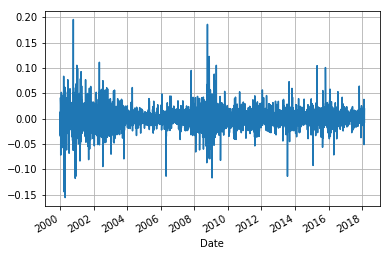

In [23]:
msftReturns = msftPrices['Returns']
msftReturns.plot(grid=True)
plt.show()

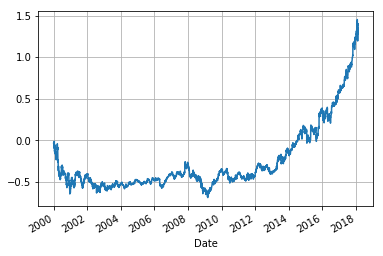

In [24]:
msftCumulativeReturns = ((1+msftReturns).cumprod()-1)
msftCumulativeReturns.plot(grid=True)
plt.show()

## Market capitalization

**Market Cap**: The value of a company's publically traded shares

### Market-cap weighted portfolios
$ w_{mcap_n} = \frac{mcap_{n}}{\sum\limits^n_{i=1}mcap_i} $

### Market-cap weights
```python
mCap = np.array([100, 200, 100, 100])
mCapWeights = mCap / sum(mCap)
mCapWeights
```

# 2.1 Correlation and covariance

In [25]:
# Correlation matrix
correlationMatrix = stockReturns.corr()
correlationMatrix

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914,0.509472,0.006766,0.542367,0.005082
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248,0.621096,-0.044827,0.543341,-0.021079
XOM,0.055505,0.084108,1.000000,0.121012,0.305926,0.015118,0.193861,-0.046813,0.197576
JNJ,0.038432,0.230215,0.121012,1.000000,0.070328,0.052781,0.067930,0.079391,0.091622
JPM,0.199914,0.191248,0.305926,0.070328,1.000000,0.013919,0.257401,0.095245,0.252832
AMZN,0.509472,0.621096,0.015118,0.052781,0.013919,1.000000,-0.092188,0.653030,-0.017909
GE,0.006766,-0.044827,0.193861,0.067930,0.257401,-0.092188,1.000000,-0.024364,0.292706
FB,0.542367,0.543341,-0.046813,0.079391,0.095245,0.653030,-0.024364,1.000000,-0.024505
T,0.005082,-0.021079,0.197576,0.091622,0.252832,-0.017909,0.292706,-0.024505,1.000000


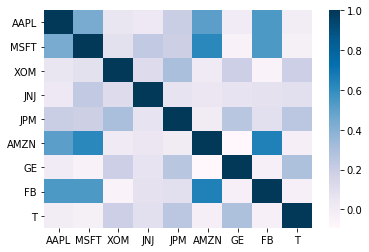

In [26]:
# Correlation matrix heatmap
import seaborn as sns
ax = sns.heatmap(correlationMatrix, cmap='PuBu')

## Portfolio standard deviation

$ \sigma_p = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2w_1w_2\rho_{1,2}\sigma_1\sigma_2} $

- $\sigma_p$: portfolio standard deviation
- $w$: asset weight
- $\sigma$: asset volatility
- $\rho_{1,2}$: correlation between assets 1 and 2

To calculate the portfolio volatility:
```python
portfolioVolatility = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights)))
```

In [27]:
covarianceMatrix = stockReturns.cov()
covarianceMatrix

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.230004e-04,0.000045,0.000004,0.000003,0.000023,0.000075,9.366843e-07,0.000064,6.028459e-07
MSFT,4.523795e-05,0.000087,0.000006,0.000015,0.000018,0.000076,-5.218049e-06,0.000054,-2.102457e-06
XOM,4.335558e-06,0.000006,0.000050,0.000006,0.000022,0.000001,1.704432e-05,-0.000004,1.488464e-05
JNJ,3.072253e-06,0.000015,0.000006,0.000052,0.000005,0.000005,6.112208e-06,0.000006,7.064036e-06
JPM,2.268091e-05,0.000018,0.000022,0.000005,0.000105,0.000002,3.287008e-05,0.000010,2.766552e-05
AMZN,7.462331e-05,0.000076,0.000001,0.000005,0.000002,0.000174,-1.519864e-05,0.000092,-2.530026e-06
GE,9.366843e-07,-0.000005,0.000017,0.000006,0.000033,-0.000015,1.558316e-04,-0.000003,3.908441e-05
FB,6.445736e-05,0.000054,-0.000004,0.000006,0.000010,0.000092,-3.259186e-06,0.000115,-2.808798e-06
T,6.028459e-07,-0.000002,0.000015,0.000007,0.000028,-0.000003,3.908441e-05,-0.000003,1.144161e-04


In [28]:
# Annualizing the covariance matrix
covarianceMatrixAnnual = covarianceMatrix*252
covarianceMatrixAnnual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


## Portfolio standard deviation using covariance

### Portfolio volatility:
$ \sigma_{portfolio} = \sqrt{w_T \bullet \Sigma \bullet w} $

- $\sigma_{portfolio}$: portfolio volatility
- $\Sigma$: covariance matrix of returns
- $w$: portfolio weights ($w_T$ is transposed portfolio weights)
- $\bullet$: dot-multiplication operator

### Matrix transpose
$ \begin{bmatrix} 1 & 2 \end{bmatrix}^T = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $

### Dot product
$ a \bullet b = \sum\limits^{n}_{i=1}a_ib_i = a_1b_1 + a_2b_2 + \ldots + a_nb_n $

# 2.2 Markowitz portfolios

## Sharpe ratio
This is a measure of risk-adjusted return

$ S = \frac{R_a-r_f}{\sigma_a} $

- $S$: sharpe ratio
- $R_a$: asset return
- $r_f$: risk-free rate of return
- $\sigma_a$: asset volatility

![Markowitz portfolios](the-markowitz-portfolios.PNG)

- **MSR**: max sharpe ratio portfolio
- **GMV**: global minimum volatility portfolio

To choose the best portfolio:
- Portfolio on the bounding edge of the efficient frontier
- Higher return is available if you can stomach higher risk

In [29]:
numStocks = 9
riskFree = 0
stockWeights['Sharpe'] = (stockWeights['Returns']-riskFree) / stockWeights['Volatility']
stockWeights.head()
MSR = stockWeights.sort_values(by=['Sharpe'], ascending=False)
MSRWeights = MSR.iloc[0, 0:numStocks]
np.array(MSRWeights)

array([0.00755369, 0.00573255, 0.00724446, 0.16672379, 0.38235578,
       0.01794065, 0.0103131 , 0.01125444, 0.39088154])

#### Past performance is not a guarantee of future returns

Max Sharpe ratio portfolio sound nice, but in reality, returns are difficult to predict

In [30]:
GMV = stockWeights.sort_values(by=['Volatility'], ascending=True)
GMVWeights = GMV.iloc[0,0:numStocks]
np.array(GMVWeights)

array([0.08658622, 0.01522472, 0.04522291, 0.34099938, 0.02868646,
       0.03481758, 0.06975889, 0.01879761, 0.35990623])

# 3.0 The capital asset pricing asset

## CAPM (Capital asset pricing model)
CAPM is the fundamental building block for other models in finance

$ E(R_P) - RF = \beta_P(E(R_M) - RF) $

- $E(R_p) - RF$: excess expected return of a stock or portfolio P
- $E(R_M) - RF$: excess expected return of the broad market portfolio B
- $RF$: regional risk-free rate
- $\beta_p$: portfolio beta / exposure to the braod market portfolio B

### Calculating historical beta using covariance
$ \beta_P = \frac{cov(R_P,R_B)}{var(R_B)} $

- $cov(R_P,R_B)$: covariance between portfolio P and the benchmark market index B
- $var(R_B)$: variance of the benchmark market index

### Excess returns
`Excess return = Portfolio return - Risk free return`

In [31]:
famaFrenchFactors = pd.read_csv('data/FamaFrenchFactors.csv', index_col='Date', parse_dates=['Date'])
print(famaFrenchFactors.info())
famaFrenchFactors.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2013-01-03 to 2017-12-29
Data columns (total 7 columns):
Portfolio        1258 non-null float64
Market_Excess    1258 non-null float64
SMB              1258 non-null float64
HML              1258 non-null float64
RMW              1258 non-null float64
CMA              1258 non-null float64
RF               1258 non-null float64
dtypes: float64(7)
memory usage: 78.6 KB
None


,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


In [32]:
convarianceMatrix = famaFrenchFactors[['Portfolio','Market_Excess']].cov()
convarianceMatrix

,Portfolio,Market_Excess
Portfolio,0.000070,0.000057
Market_Excess,0.000057,0.000059


In [33]:
convarianceCoefficient = convarianceMatrix.iloc[0,1]
convarianceCoefficient

5.726320572793939e-05

In [34]:
benchmarkVariance = famaFrenchFactors['Market_Excess'].var()
benchmarkVariance

5.8803350882118946e-05

In [35]:
portfolioBeta = convarianceCoefficient / benchmarkVariance
portfolioBeta

0.9738085477940358

### Calculating beta using linear regression

In [36]:
import statsmodels.formula.api as smf

In [37]:
model = smf.ols(formula='Portfolio ~ Market_Excess', data=famaFrenchFactors)
fit = model.fit()
beta = fit.params['Market_Excess']
beta

0.9738085477940359

### R-squared vs Adjusted R-squared

In [38]:
rSquared = fit.rsquared
rSquared

0.794502321892429

In [39]:
adjustedRSquared = fit.rsquared_adj
adjustedRSquared

0.7943387090913879

# 3.1 Alpha and multi-factor models

## The Fama-French 3 factor model

$ R_P = RF + \beta_M(R_M - RF) + b_{SMB} \bullet SMB + b_{HML} \bullet HML + \alpha $

- $SMB$: small minus big factor
- $b_{SMB}$: exposure to SMB factor
- $HML$: high minus low factor
- $b_{HML}$: exposure to HML factor
- $\alpha$: performance which is unexplained by any other factors
- $\beta_M$: beta to the broad market portfolio B

In [40]:
famaFrenchFactors.head()

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


In [41]:
model2 = smf.ols(formula='Portfolio ~ Market_Excess + SMB + HML', data=famaFrenchFactors)
fit2 = model2.fit()
adjustedRSquared2 = fit2.rsquared_adj
adjustedRSquared2

0.8194687130934963

In [42]:
fit2.pvalues['HML']

4.6546317150001906e-07

In [43]:
fit2.pvalues['HML'] < 0.05

True

In [44]:
fit2.params['HML']

-0.10867209271322338

In [45]:
fit2.params['SMB']

-0.262151159124763

In [46]:
portfolioAlpha = fit2.params['Intercept']
portfolioAlpha

0.00019140256747527139

In [47]:
portfolioAlphaAnnualized = ((1+portfolioAlpha)**252)-1
portfolioAlphaAnnualized

0.049410766185005395

# 3.2 Expanding the 3-factor model

## The Fama-French 5 factor model

2 additional factors:
- **RMW**: profitability
    - returns of companies with high vs low operating profitability
- **CMA**: investment
    - returns of companies with aggressive vs conservative investments

In [48]:
model3 = smf.ols(formula='Portfolio ~ Market_Excess + SMB + HML + RMW + CMA', data=famaFrenchFactors)
fit3 = model3.fit()
adjustedRSquared3 = fit3.rsquared_adj
adjustedRSquared3

0.8368098114264946

# 4.0 Estimating tail risk

**Tail risk** is the risk of extreme investment outcomes

- Historical drawdown
- Value at risk
- Conditional value at risk
- Monte-Carlo simulation

## Historical drawdown
![Historical drawdown](historical-drawdown.PNG)

**Drawdown** is the percentage loss from the highest cumulative historical point

$ Drawdown = \frac{r_t}{RM} - 1 $

- $r_t$: cumulative return at time t
- **RM**: running maximum

In [49]:
uso = pd.read_csv('data/USO.csv', index_col='Date', parse_dates=['Date'])
uso.head()

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.040688
2007-01-05,0.009285
2007-01-08,-0.007109
2007-01-09,-0.004001


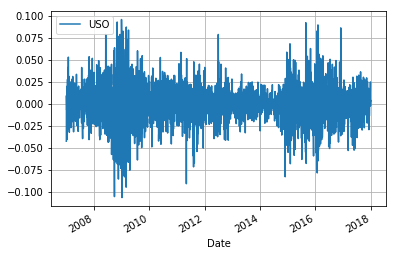

In [50]:
uso.plot(grid=True)
plt.show()

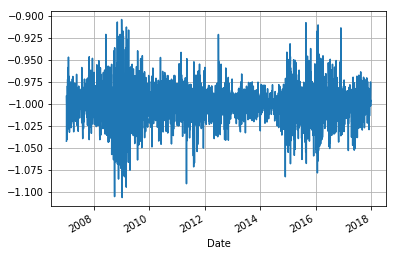

In [51]:
runningMax = np.maximum.accumulate(uso['USO'])
runningMax[runningMax < 1] = 1
drawdown = uso['USO'] / runningMax - 1
drawdown.plot(grid=True)
plt.show()

## Historical value at risk

![Historical value](historical-shortfall-vs-value.PNG)

**Value at risk (VaR)** is a threshold with a given confidence level that losses will not historically  exceed a certain level

E.g.
`VaR(95) = -2.3%`

95% certain that losses will not exceed `-2.3%` in a given day based on historical value

## Historical expected shortfall

**Conditional value at risk (cVaR)**: estimate of expected losses sustained in the worst 1-x% of scenarios

`cVaR(95) = -2.5%`

In worst 5% of cases, losses were on average exceed -2.5% historically.

In [52]:
varLevel = 95
var95 = np.percentile(stockReturns, 100 - varLevel)
var95

-0.01449299137117219

In [53]:
cVar95 = stockReturns[stockReturns <= var95].mean()
cVar95

AAPL   -0.022576
MSFT   -0.020743
XOM    -0.016397
JNJ    -0.020421
JPM    -0.022801
AMZN   -0.022419
GE     -0.028429
FB     -0.025118
T      -0.024000
dtype: float64

# 4.1 VaR extensions

![VaR quantiles](var-quantiles.PNG)

**Empirical historical values** are those that have actually occurred. For simulation, use sample from probability distribution

In [54]:
from scipy.stats import norm

# parametric VaR(95)
mu = np.mean(stockReturns)
std = np.std(stockReturns)
confLevel = 0.05
VaR = norm.ppf(confLevel, mu, std)
VaR

array([-0.0165694 , -0.01390218, -0.01169161, -0.01093551, -0.01579565,
       -0.01982375, -0.02264449, -0.01582797, -0.01766494])

## Scaling risk

![Scaling risk](scaling-risk.PNG)

Assuming you have a one-day estimate of VaR(95). Estimate 5-day VaR(95)

In [55]:
forecastDays = 5
VaR5Days = VaR*np.sqrt(forecastDays)
VaR5Days

array([-0.03705031, -0.03108623, -0.02614324, -0.02445253, -0.03532015,
       -0.04432724, -0.05063461, -0.03539243, -0.0395    ])

# 4.2 Random walks

In [56]:
T = 252
S0 = 10
randomReturns = np.random.normal(mu[0], std[0], T) + 1
forecastValues = S0 * randomReturns.cumprod()
forecastValues

array([ 9.93268298,  9.839165  ,  9.78004729,  9.98986453, 10.18975741,
       10.29196971, 10.15508415, 10.18640904, 10.00305312, 10.1441052 ,
       10.13060998, 10.25612842, 10.35185295, 10.41050627, 10.40811442,
       10.53198689, 10.55684873, 10.54925578, 10.82678938, 11.09308329,
       11.17982373, 11.14640211, 11.23075454, 11.18930753, 11.020824  ,
       11.13316664, 11.3270496 , 11.4072036 , 11.48856484, 11.36539523,
       11.41376793, 11.32729028, 11.32094647, 11.22123941, 11.3934712 ,
       11.42815007, 11.49508675, 11.34393417, 11.54027405, 11.5860125 ,
       11.8208373 , 11.8206353 , 12.15460382, 12.15139297, 12.29396678,
       12.18686803, 12.26430772, 12.1348507 , 12.33187823, 12.21587592,
       12.07493125, 12.03019638, 12.01956322, 11.92990953, 11.75298698,
       11.80301947, 12.1005046 , 11.98499524, 12.09018548, 12.15735638,
       12.21818344, 12.29845677, 12.40679305, 12.55870858, 12.6091974 ,
       12.65051284, 12.64897319, 12.67502332, 12.73605392, 12.81

In [57]:
# count, bins, ignored = plt.hist(forecastValues, 30, density=True)

# plt.plot(bins, 
#          1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu[0])**2 / (2 * std[0]**2)), 
#          linewidth=2, color='r')

# plt.show()

In [58]:
'''Calculate the VaR(95) of 100 Monte Carlo simulations'''

mu = 0.0005
vol = 0.001
T = 252
simulationReturns = []

for i in range(100):
    randomReturns = np.random.normal(mu, vol, T)
    simulationReturns.append(randomReturns)

VaR95 = np.percentile(simulationReturns, 5)
VaR95

-0.001145332264845977

# 4.3 Understanding risk

Summary:
- Moments and distributions
- Portfolio composition
- Correlation and covariance
- Markowitz optimization
- Beta & CAPM
- FAMA french factor modeling
- Alpha
- Value at risk
- Monte Carlo simulations